Objective:  Build a classifier model to predict sentiments (Positive, Neutral and Negative) using the reviews collected by scraping the Tripadvisor website.
Dataset: The dataset was prepared by scraping 1000 reviews for each of the three hotels (Hyatt_Regency, Trident and Le Meridian) from Tripadvisor website using HTML parsing.

In [1]:
## importing libraries
from os import listdir
from os.path import join
import pandas as pd
import numpy as np
import nltk.corpus 
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
import re 
import string
import math
import os
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import requests
from lxml import html
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
import nltk
from sklearn.metrics import accuracy_score, confusion_matrix

# Data Extraction

### Scraping Reviews From Hyatt Regency Gurgaon
i = 1
hotel_Review_final= pd.DataFrame()


while i< 201:
    url= 'https://www.tripadvisor.in/Hotel_Review-g297615-d4107301-Reviews-or'+ str(5*i) + '-Hyatt_Regency_Gurgaon-Gurugram_Gurgaon_Gurgaon_District_Haryana.html'
    doc = requests.get(url)
    htmlpage = doc.content
    i=i+1
    
    
    parser = html.fromstring(htmlpage)
    sampXpath = '//*[contains(concat( " ", @class, " " ), concat( " ", "IRsGHoPm", " " ))]//text()'
    data = parser.xpath(sampXpath)
    review= pd.DataFrame(data)
    #review = review.replace(r'^\s*$', np.nan, regex=True)
    #review = review[review.str.len() > 0]
    review = review.replace(['…'],'NaN')
    review.columns = ["Review"]
    review.drop( review[ review['Review'] == 'NaN' ].index, inplace=True)
    #print(review['Review'])
    review.reset_index(drop = True, inplace=True)
 
    parser = html.fromstring(htmlpage)
    sampXpath = '//*[contains(concat( " ", @class, " " ), concat( " ", "nf9vGX55", " " ))]/span/@class'
    rating = parser.xpath(sampXpath)

    #print(rating)
    ratingp= [int(r.replace('ui_bubble_rating bubble_',''))/10 for r in rating]
    new= pd.DataFrame(ratingp)
    #new = new.dropna(axis=0) 
    new.columns = ["Rating"]
    new.reset_index(drop = True, inplace=True)
    #print(new)

    hotel_Review = pd.concat([review["Review"], new["Rating"]], axis=1)
    #hotel_Review.reset_index(drop = True, inplace=True)
    #hotel_Review.columns = ["Review", "Rating"]
    hotel_Review_final= hotel_Review_final.append(hotel_Review, ignore_index=True)
    #print(hotel_Review_final)

hotel_Review_final

### Scraping Reviews From Le_Meridian Gurgaon
i = 1
hotel_Review_final1= pd.DataFrame()


while i< 201:
    url= 'https://www.tripadvisor.in/Hotel_Review-g297615-d1772516-Reviews-or'+ str(5*i) + '-Le_Meridien_Gurgaon_Delhi_NCR-Gurugram_Gurgaon_Gurgaon_District_Haryana.html'
    doc = requests.get(url)
    htmlpage = doc.content
    i=i+1
    
    
    parser = html.fromstring(htmlpage)
    sampXpath = '//*[contains(concat( " ", @class, " " ), concat( " ", "IRsGHoPm", " " ))]//text()'
    data = parser.xpath(sampXpath)
    review= pd.DataFrame(data)

    review = review.replace(['…'],'NaN')
    review.columns = ["Review"]
    review.drop( review[ review['Review'] == 'NaN' ].index, inplace=True)
    review.reset_index(drop = True, inplace=True)
 
    parser = html.fromstring(htmlpage)
    sampXpath = '//*[contains(concat( " ", @class, " " ), concat( " ", "nf9vGX55", " " ))]/span/@class'
    rating = parser.xpath(sampXpath)

   
    ratingp= [int(r.replace('ui_bubble_rating bubble_',''))/10 for r in rating]
    new= pd.DataFrame(ratingp)
    new.columns = ["Rating"]
    new.reset_index(drop = True, inplace=True)


    hotel_Review = pd.concat([review["Review"], new["Rating"]], axis=1)
    hotel_Review_final1= hotel_Review_final1.append(hotel_Review, ignore_index=True)


hotel_Review_final1

### Scraping Reviews From Trident Gurgaon

i = 1
hotel_Review_final2= pd.DataFrame()


while i< 201:
    url= 'https://www.tripadvisor.in/Hotel_Review-g297615-d300603-Reviews-or'+ str(5*i) + '-Trident_Gurgaon-Gurugram_Gurgaon_Gurgaon_District_Haryana.html'
    doc = requests.get(url)
    htmlpage = doc.content
    i=i+1
    
    parser = html.fromstring(htmlpage)
    sampXpath = '//*[contains(concat( " ", @class, " " ), concat( " ", "IRsGHoPm", " " ))]//text()'
    data = parser.xpath(sampXpath)
    review= pd.DataFrame(data)

    review = review.replace(['…'],'NaN')
    review.columns = ["Review"]
    review.drop( review[ review['Review'] == 'NaN' ].index, inplace=True)
    review.reset_index(drop = True, inplace=True)
 
    parser = html.fromstring(htmlpage)
    sampXpath = '//*[contains(concat( " ", @class, " " ), concat( " ", "nf9vGX55", " " ))]/span/@class'
    rating = parser.xpath(sampXpath)

    
    ratingp= [int(r.replace('ui_bubble_rating bubble_',''))/10 for r in rating]
    new= pd.DataFrame(ratingp)
    new.columns = ["Rating"]
    new.reset_index(drop = True, inplace=True)

    hotel_Review = pd.concat([review["Review"], new["Rating"]], axis=1)
    hotel_Review_final2= hotel_Review_final2.append(hotel_Review, ignore_index=True)


hotel_Review_final2

##Combining the reviews from 3 Hotels into a single dataframe
Review = pd.concat([hotel_Review_final, hotel_Review_final1,hotel_Review_final2], axis=0)
Review.reset_index(drop = True, inplace=True)

Review.to_csv("C:/Users/kanik/Desktop/Desktop/ABA/Text Analytics/Assignment/Individual/Hotel_Reviews.csv", index=False)

In [2]:
#### Printing Reviews
Review = pd.read_csv("https://raw.githubusercontent.com/Kanikaitbhu/Data-Files/main/Hotel_Reviews_Text_Analytics_ASS-1.csv",index_col=False)

In [3]:
Review

,Review,Rating
0,"After lock down,it was my first stay in hotel....",5
1,"Everything i want from a star hotel , i get ev...",5
2,It was my professional trip. I was looking for...,5
3,It was a good experience staying at Hyatt Mane...,4
4,We had a for a birthday party of my wife... T...,5
...,...,...
2995,This hotel is almost odd in that it has lots o...,4
2996,This hotel is really amazing. Me and my collea...,5
2997,I had a trip to Gurgaon for work and stayed at...,5
2998,excellent!. total comfort and best homely feel...,5


# Data Exploration

In [4]:
### Rating distribution for our data
Review['Rating'].value_counts()

5    2582
4     303
3      61
1      35
2      19
Name: Rating, dtype: int64

5    2582
4     303
3      61
1      35
2      19
Name: Rating, dtype: int64


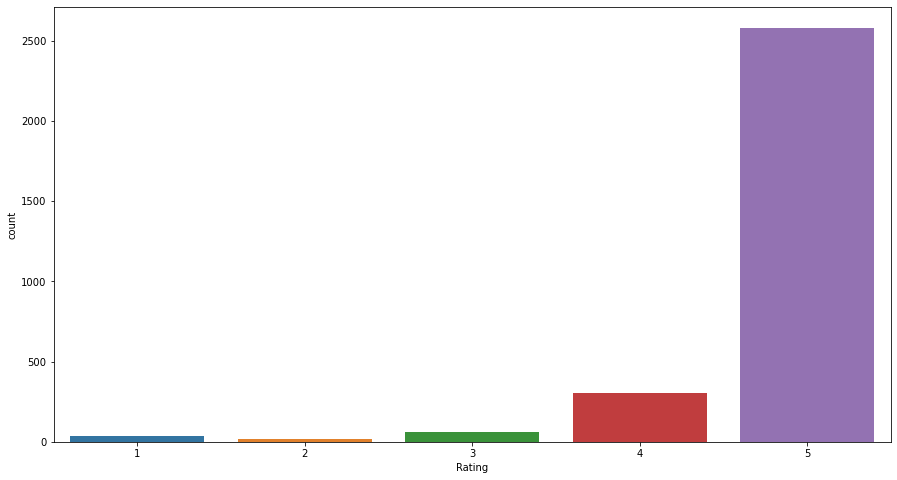

In [5]:
# Checking the proportion of rating in the total reviews 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize=(15,8))
ax = sns.countplot(x="Rating", data=Review)
print(Review['Rating'].value_counts())

The Review rating was highly skewed with the above distribution. All the three hotels selected belonged to luxury category and hence had the rating inclined towards the higher side.

In [6]:
#### Mapping Raviews for the luxury hotels
    # 5 - Positive(-1)
    # 4 - Neutral(0)
    # 3,2,1 - Negative(-1)
Review['Rating'] = Review['Rating'].map({5:1,4:0,3:-1,2:-1,1:-1})

The ratings are labelled as positive, neutral, and negative for the classifier modelling.  
Majority review ratings belong to category 5.0 owing to the higher customer satisfaction. Hence ‘Positive (1)’ was assigned to Review having Rating 5.0.
‘Neutral (0)’ was assigned to Reviews with rating as 4.0.
Review Ratings of 3, 2 and 1 for these hotels was considered negative as these indicate a lower satisfaction from the Hotel services. Hence ‘Negative (-1)’ was assigned to the remaining reviews 3.0, 2.0, 1.0.


In [7]:
### Checking the distribution of Positive, Neutral and Negative reviews
Review["Rating"].value_counts()

 1    2582
 0     303
-1     115
Name: Rating, dtype: int64

##The data is unbalanced with higher Positive Reviews

In [8]:

### plotting the word clouds

from wordcloud import WordCloud

def wc(data,bgcolor,title):
    plt.figure(figsize = (50,50))
    wc = WordCloud(background_color = bgcolor, max_words = 2000, random_state=42, max_font_size = 50)
    wc.generate(' '.join(data))
    plt.imshow(wc)
    plt.axis('off')

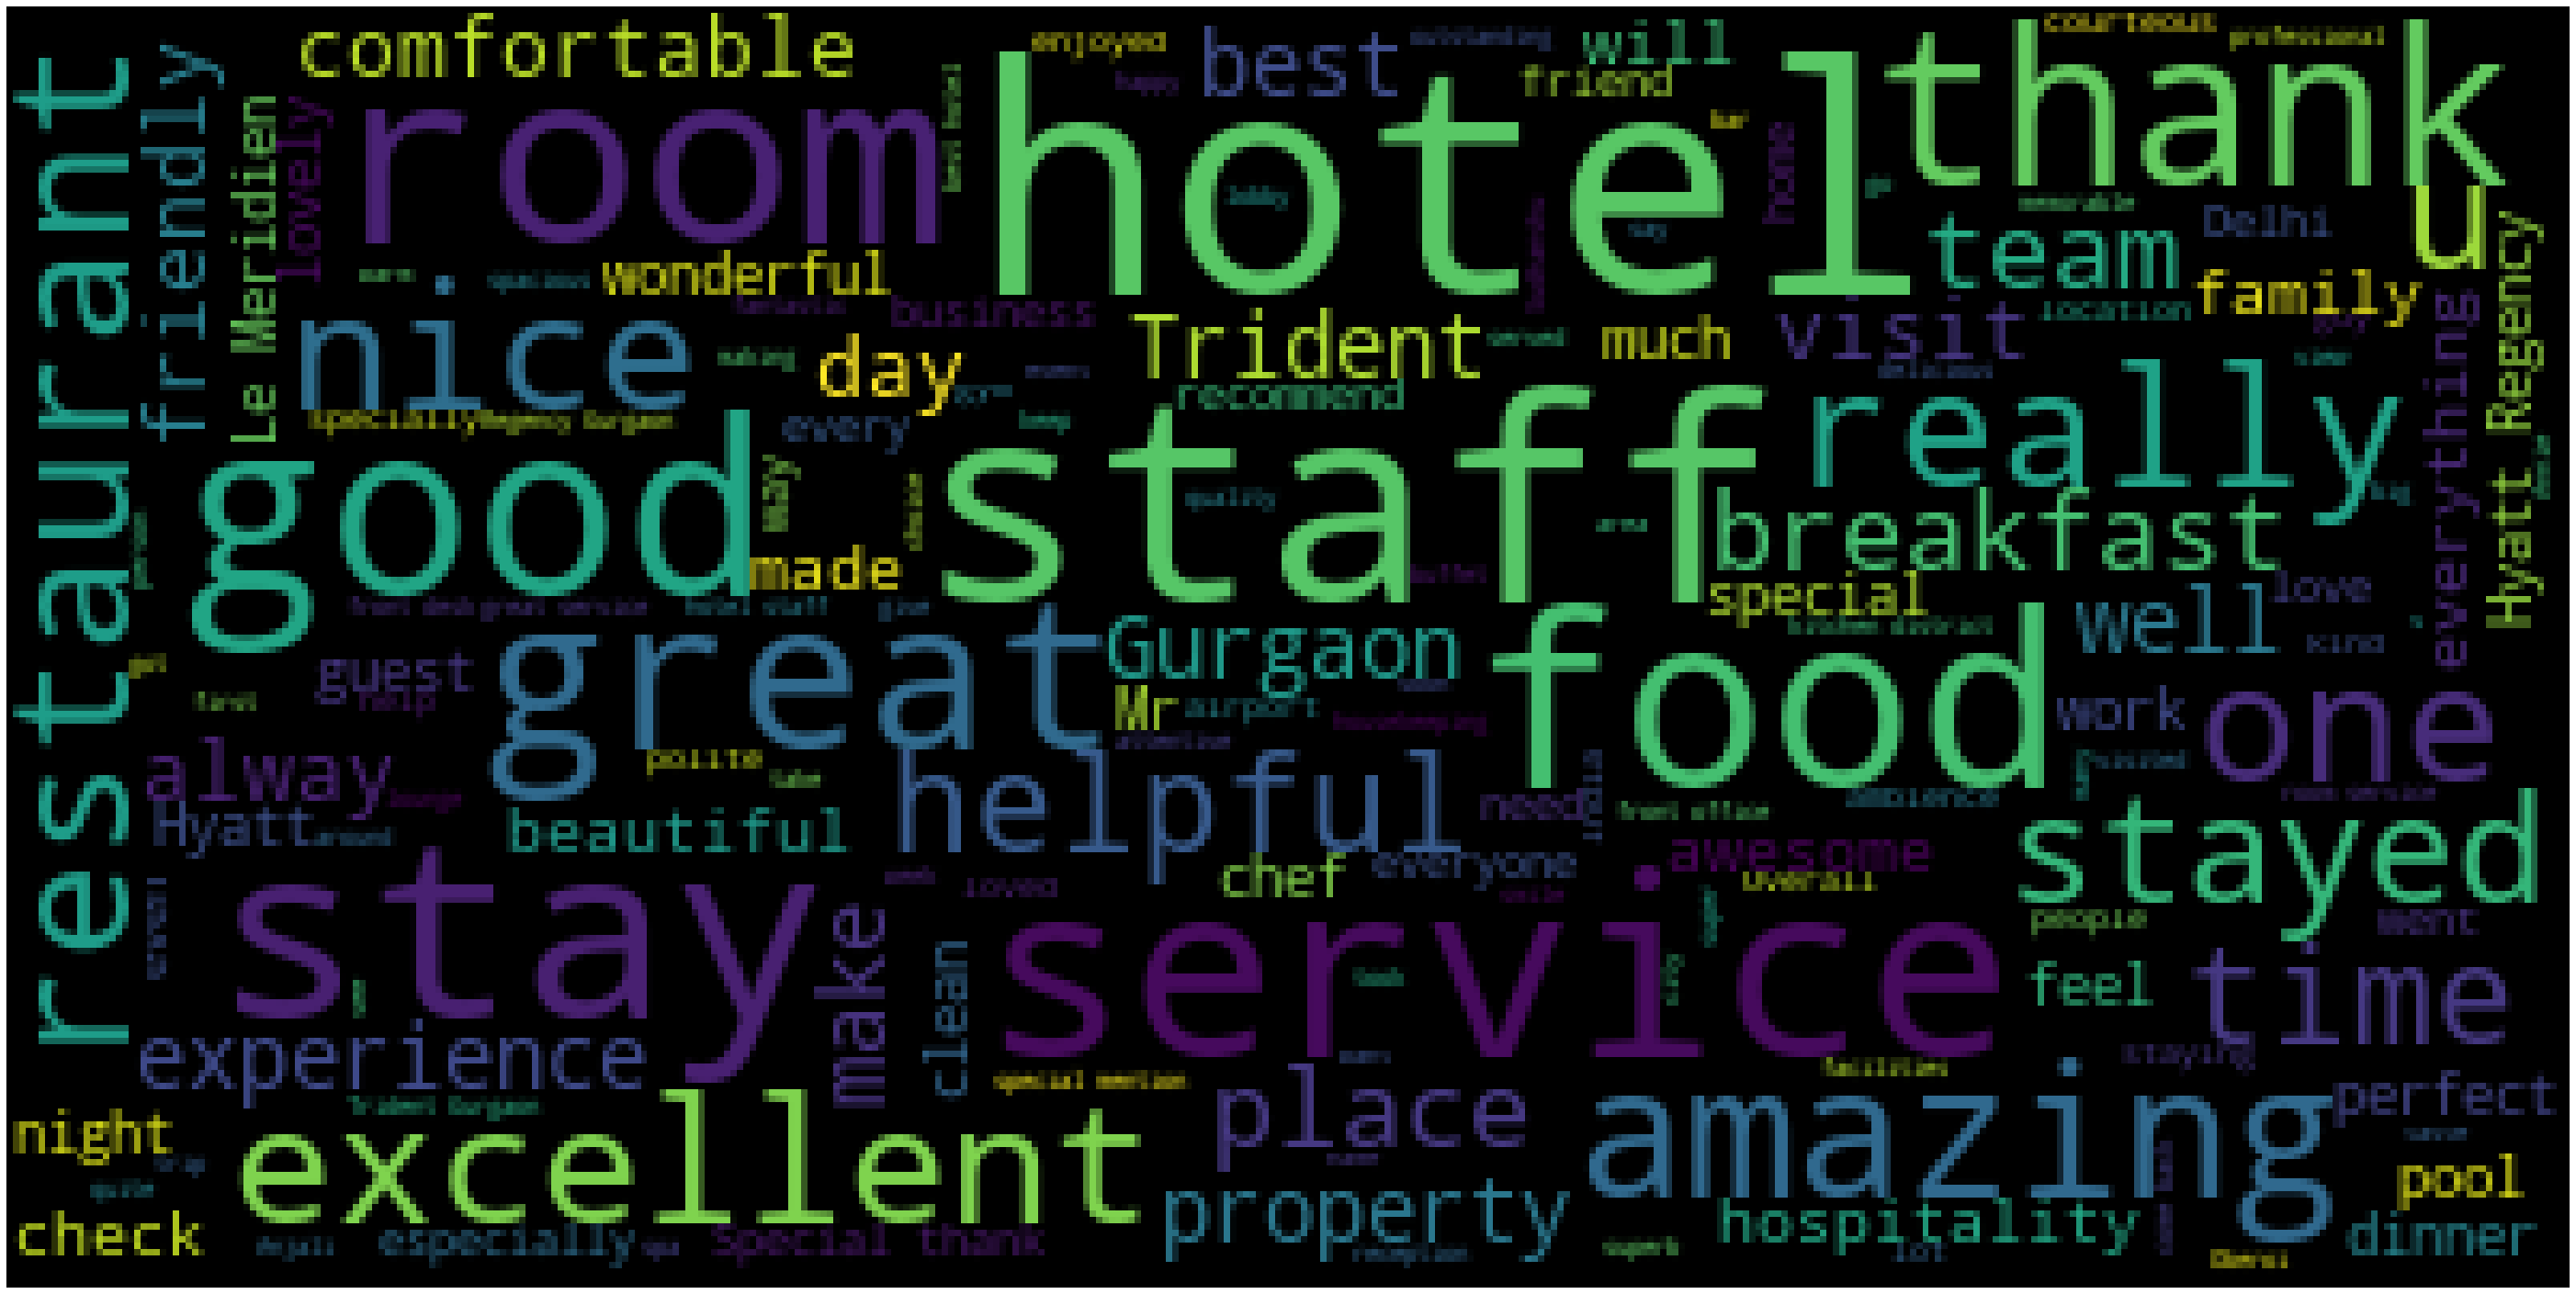

In [9]:
### Word Cloud for Positive Reviews
wc(Review['Review'][Review.Rating == 1.0],'black','Common Words' )

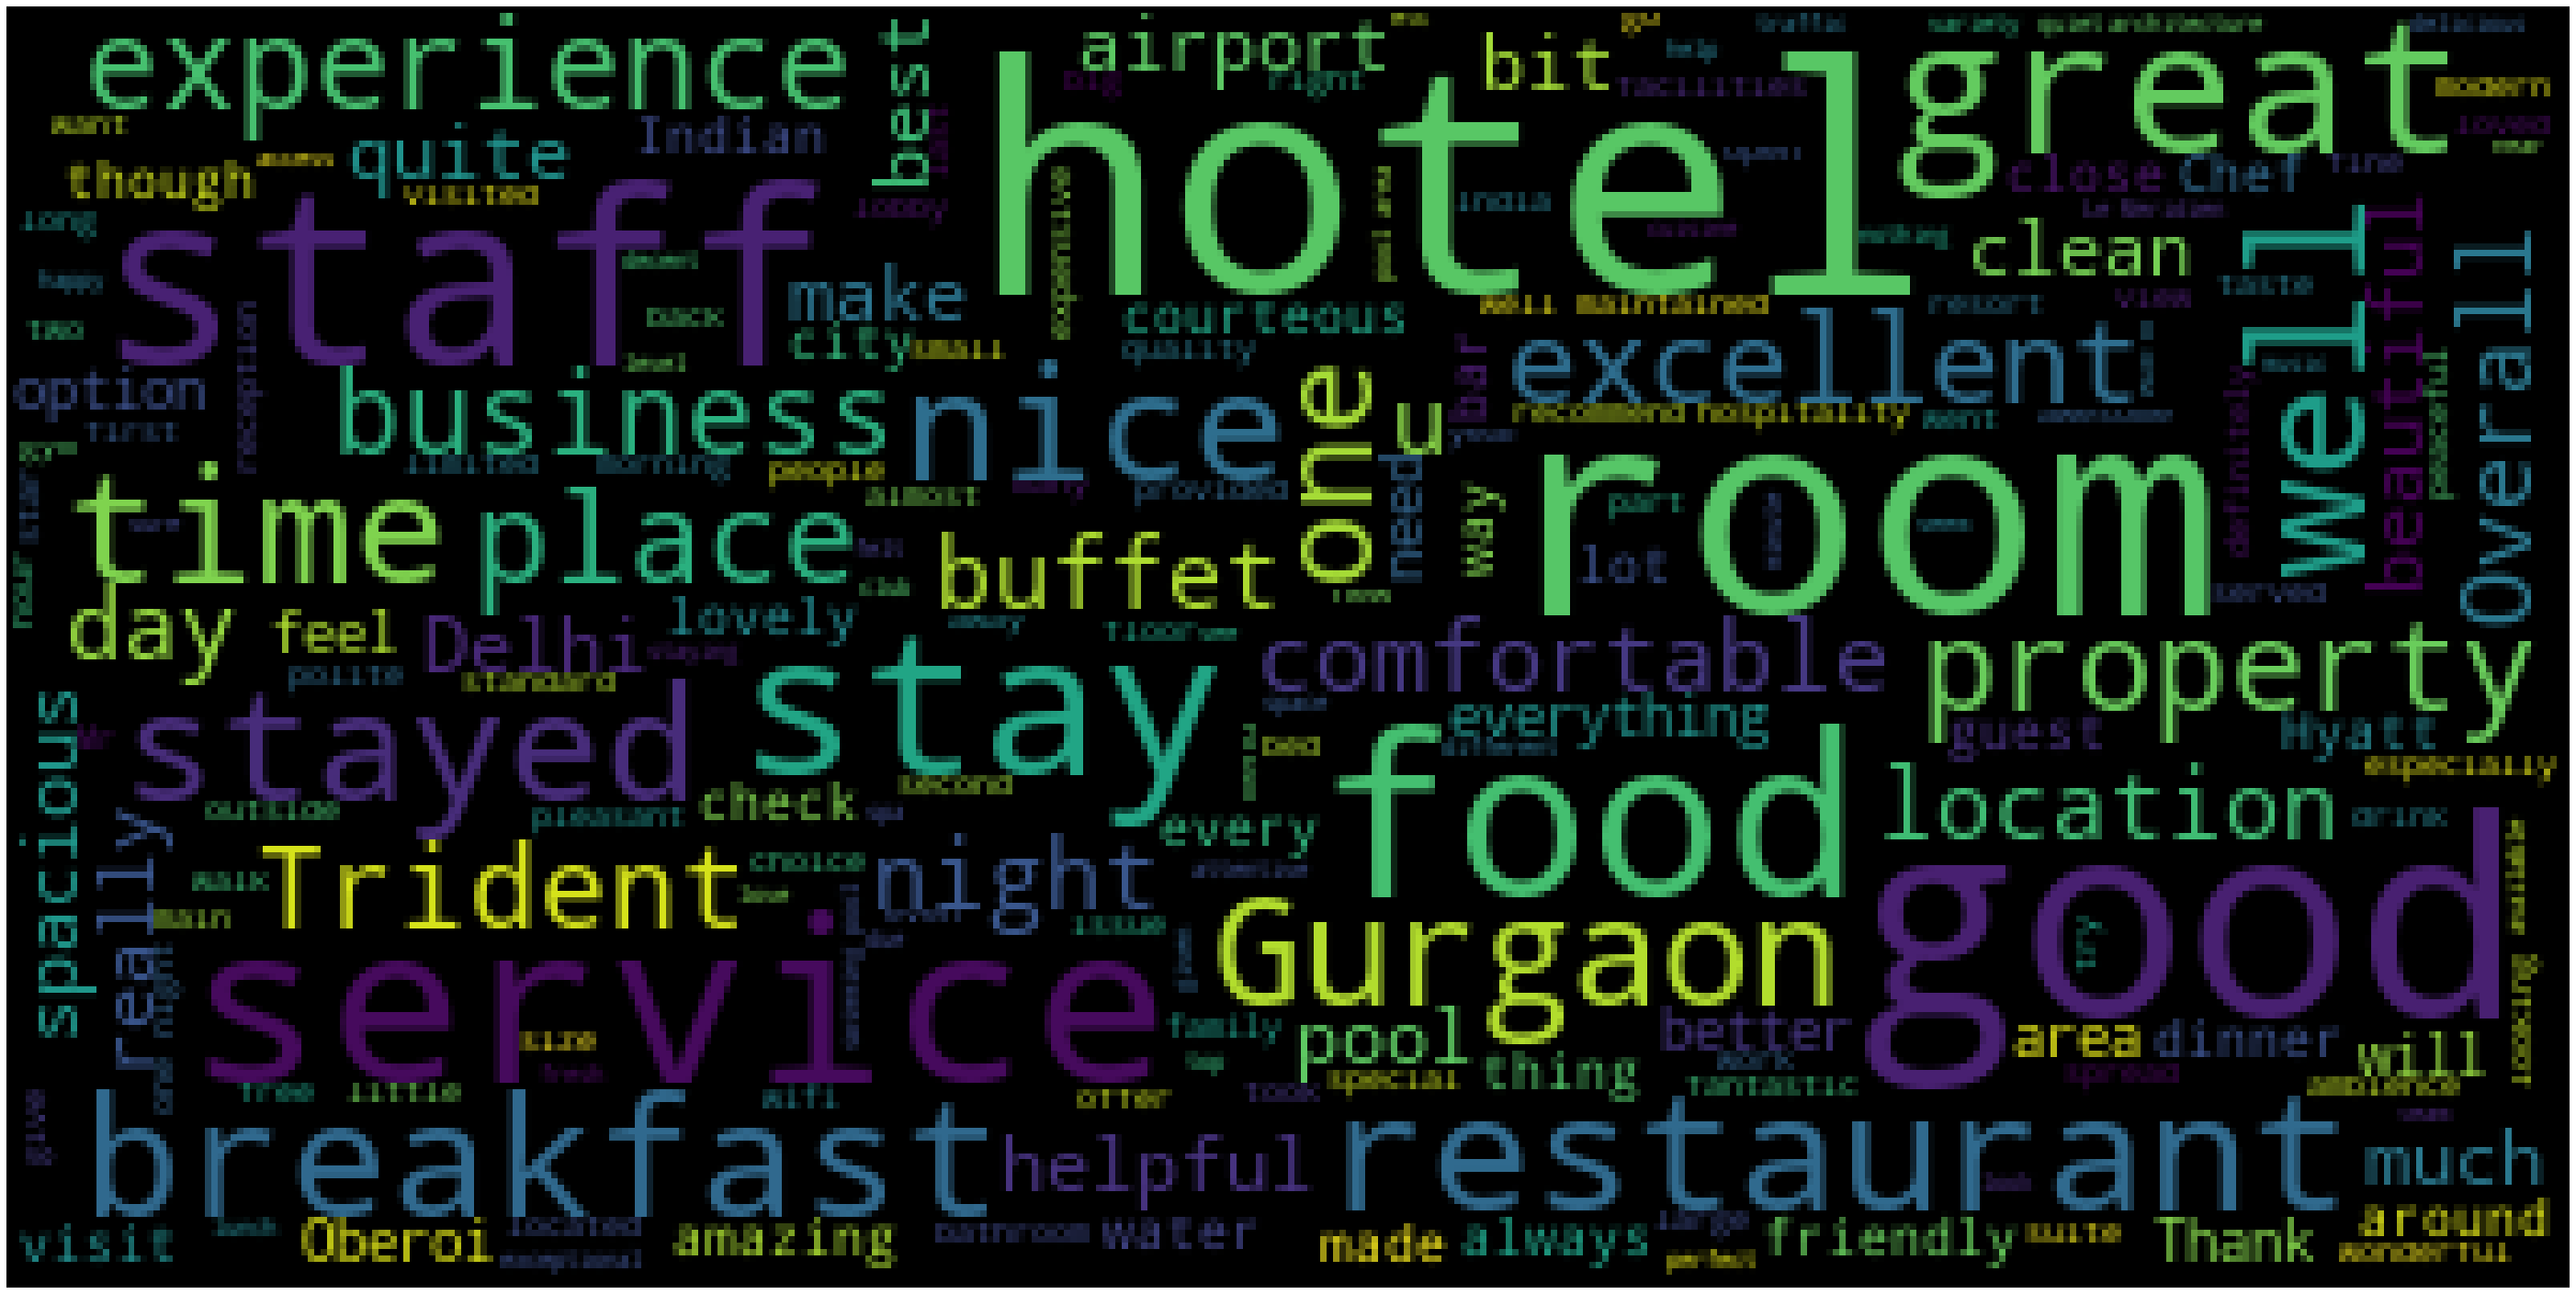

In [10]:
### Word Cloud for Neutral Reviews
wc(Review['Review'][Review.Rating == 0],'black','Common Words' )

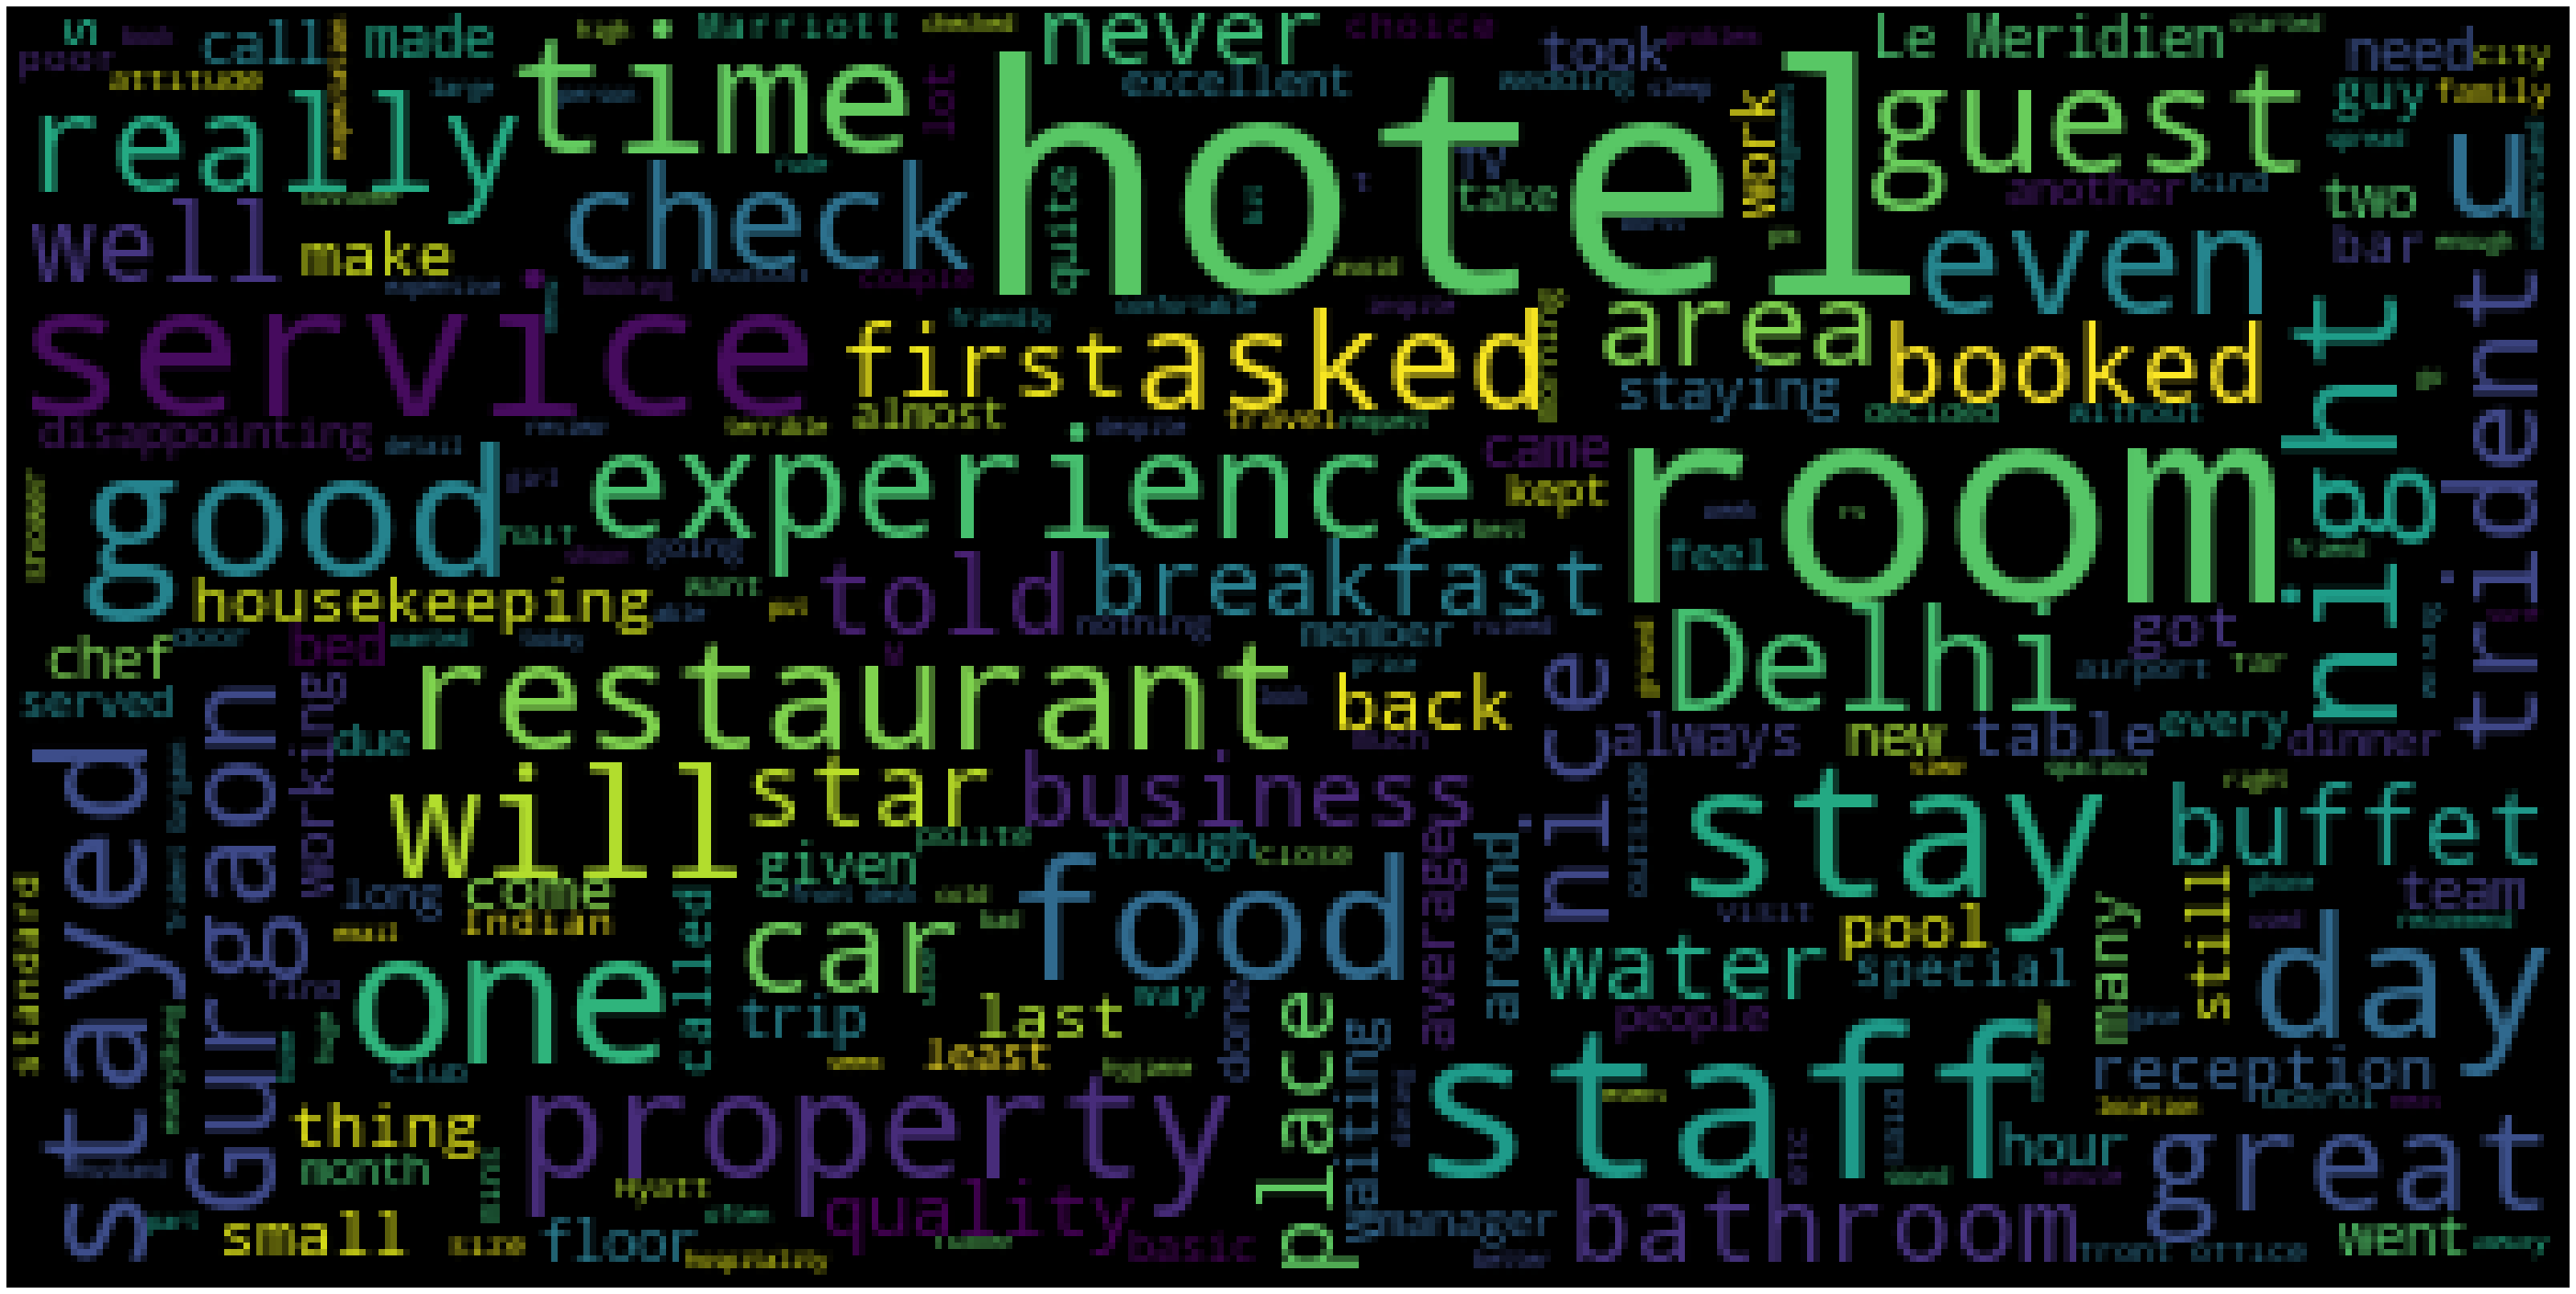

In [11]:
### Word Cloud for Negative Reviews
wc(Review['Review'][Review.Rating == -1 ],'black','Common Words' )

# Data Pre-processing and Preparation Steps

## 1. Removing Numbers, Special Characters using Regex

In [12]:
### Cleaning our data..Removing punctuations, numbers and Special characters

def  clean_text(df, text_field, new_text_field_name):
    df[new_text_field_name] = df[text_field].str.lower()
    df[new_text_field_name] = df[new_text_field_name].apply(lambda elem: re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", elem))  
    # remove numbers
    df[new_text_field_name] = df[new_text_field_name].apply(lambda elem: re.sub(r"\d+", "", elem))
    
    return df

Review = clean_text(Review, 'Review', 'Review_clean')
Review.head()

,Review,Rating,Review_clean
0,"After lock down,it was my first stay in hotel....",1,after lock downit was my first stay in hotel i...
1,"Everything i want from a star hotel , i get ev...",1,everything i want from a star hotel i get eve...
2,It was my professional trip. I was looking for...,1,it was my professional trip i was looking for ...
3,It was a good experience staying at Hyatt Mane...,0,it was a good experience staying at hyatt mane...
4,We had a for a birthday party of my wife... T...,1,we had a for a birthday party of my wife the ...


## 2. Removing Stop words

In [13]:
### Removing stop words
stop= set(stopwords.words('english'))
stop.update(['.',';',',','"',':','-'])


Review['Review_clean']= Review['Review_clean'].apply(
        lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
Review.head()

,Review,Rating,Review_clean
0,"After lock down,it was my first stay in hotel....",1,lock downit first stay hotel many doubt stay h...
1,"Everything i want from a star hotel , i get ev...",1,everything want star hotel get even covid kaal...
2,It was my professional trip. I was looking for...,1,professional trip looking safe relaxing stay e...
3,It was a good experience staying at Hyatt Mane...,0,good experience staying hyatt manesar hospital...
4,We had a for a birthday party of my wife... T...,1,birthday party wife cleaniness quality hotel g...


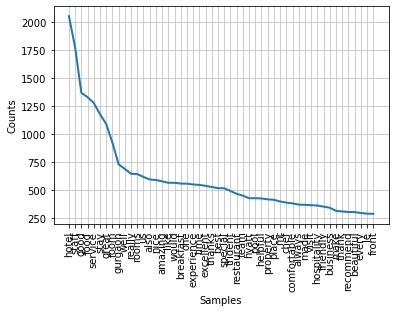

In [14]:
#### Getting the word frequency plot

string =[''.join(review) for review in Review['Review_clean'].values]
string1= str([''.join(string)])
words= nltk.word_tokenize(string1)
fdist = FreqDist(words)
fdist.plot(50)

# 3. Tokenizing the data

In [15]:
# Tokenizing the text

Review['Review_clean'] = Review['Review_clean'].apply(word_tokenize)
Review

,Review,Rating,Review_clean
0,"After lock down,it was my first stay in hotel....",1,"[lock, downit, first, stay, hotel, many, doubt..."
1,"Everything i want from a star hotel , i get ev...",1,"[everything, want, star, hotel, get, even, cov..."
2,It was my professional trip. I was looking for...,1,"[professional, trip, looking, safe, relaxing, ..."
3,It was a good experience staying at Hyatt Mane...,0,"[good, experience, staying, hyatt, manesar, ho..."
4,We had a for a birthday party of my wife... T...,1,"[birthday, party, wife, cleaniness, quality, h..."
...,...,...,...
2995,This hotel is almost odd in that it has lots o...,0,"[hotel, almost, odd, lots, wasted, space, cour..."
2996,This hotel is really amazing. Me and my collea...,1,"[hotel, really, amazing, colleague, spent, thr..."
2997,I had a trip to Gurgaon for work and stayed at...,1,"[trip, gurgaon, work, stayed, property, week, ..."
2998,excellent!. total comfort and best homely feel...,1,"[excellent, total, comfort, best, homely, feel..."


In [16]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import WordPunctTokenizer
from nltk.collocations import BigramCollocationFinder
from nltk.metrics import BigramAssocMeasures

def get_bigrams(t):
    bigram_finder = BigramCollocationFinder.from_words(t)
    bigrams = bigram_finder.nbest(BigramAssocMeasures.chi_sq, 500)
    for bigram_tuple in bigrams:
        x = "%s %s" % bigram_tuple
        t.append(x)

    return t

In [17]:
temp_data = Review['Review_clean']

Review['Review_clean_bigrams']=temp_data.apply(get_bigrams)
Review.head()

,Review,Rating,Review_clean,Review_clean_bigrams
0,"After lock down,it was my first stay in hotel....",1,"[lock, downit, first, stay, hotel, many, doubt...","[lock, downit, first, stay, hotel, many, doubt..."
1,"Everything i want from a star hotel , i get ev...",1,"[everything, want, star, hotel, get, even, cov...","[everything, want, star, hotel, get, even, cov..."
2,It was my professional trip. I was looking for...,1,"[professional, trip, looking, safe, relaxing, ...","[professional, trip, looking, safe, relaxing, ..."
3,It was a good experience staying at Hyatt Mane...,0,"[good, experience, staying, hyatt, manesar, ho...","[good, experience, staying, hyatt, manesar, ho..."
4,We had a for a birthday party of my wife... T...,1,"[birthday, party, wife, cleaniness, quality, h...","[birthday, party, wife, cleaniness, quality, h..."


# 4. Lemmatizing using WordNetLemmatizer

In [18]:
## Applying lemmatization on our text
ls= WordNetLemmatizer()
Review['Review_clean'] = Review['Review_clean'].apply(
    
    lambda lst: [ls.lemmatize(word, pos = 'v') for word in lst])



Review['Review_clean_bigrams'] = Review['Review_clean_bigrams'].apply(
    
    lambda lst: [ls.lemmatize(word, pos = 'v') for word in lst])
Review


,Review,Rating,Review_clean,Review_clean_bigrams
0,"After lock down,it was my first stay in hotel....",1,"[lock, downit, first, stay, hotel, many, doubt...","[lock, downit, first, stay, hotel, many, doubt..."
1,"Everything i want from a star hotel , i get ev...",1,"[everything, want, star, hotel, get, even, cov...","[everything, want, star, hotel, get, even, cov..."
2,It was my professional trip. I was looking for...,1,"[professional, trip, look, safe, relax, stay, ...","[professional, trip, look, safe, relax, stay, ..."
3,It was a good experience staying at Hyatt Mane...,0,"[good, experience, stay, hyatt, manesar, hospi...","[good, experience, stay, hyatt, manesar, hospi..."
4,We had a for a birthday party of my wife... T...,1,"[birthday, party, wife, cleaniness, quality, h...","[birthday, party, wife, cleaniness, quality, h..."
...,...,...,...,...
2995,This hotel is almost odd in that it has lots o...,0,"[hotel, almost, odd, lot, waste, space, courty...","[hotel, almost, odd, lot, waste, space, courty..."
2996,This hotel is really amazing. Me and my collea...,1,"[hotel, really, amaze, colleague, spend, three...","[hotel, really, amaze, colleague, spend, three..."
2997,I had a trip to Gurgaon for work and stayed at...,1,"[trip, gurgaon, work, stay, property, week, ha...","[trip, gurgaon, work, stay, property, week, ha..."
2998,excellent!. total comfort and best homely feel...,1,"[excellent, total, comfort, best, homely, feel...","[excellent, total, comfort, best, homely, feel..."


In [19]:
Review['Review_clean']=[" ".join(review) for review in Review['Review_clean'].values]

In [20]:
Review['Review_clean_bigrams']=[" ".join(review) for review in Review['Review_clean_bigrams'].values]

# 5. Splitting the data in Train and Test in the ratio of 80:20 set using stratified sampling.

In [21]:
## Splitiing data to test and train using Stratified
X_train, X_test, y_train, y_test = train_test_split(Review['Review_clean'], Review['Rating'], test_size=0.20, random_state=100, stratify=Review['Rating'])

In [22]:
X_train

2746    felt great right step hotel scent lobby relax ...
409     hotel room good bathrooms die staff reception ...
426     th th time visit hotel premise like oll time e...
664     try kitchen district restaurant food scrumptio...
953     amaze experience food awesome staff friendly m...
                              ...                        
2417    world propertyworth stayamazingly beautiful wa...
1264    pleasant stay specially front office team spec...
673     excellent hospitality awesome food great exper...
1435    nice buffet spread well adopt service current ...
1250    really glad assissted mschandni msannie really...
Name: Review_clean, Length: 2400, dtype: object

In [23]:
## Checking the distribution of Train Dataset
y_train.value_counts()

 1    2066
 0     242
-1      92
Name: Rating, dtype: int64

In [24]:
## Checking the distribution of Test Dataset
y_test.value_counts()

 1    516
 0     61
-1     23
Name: Rating, dtype: int64

In [25]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import GridSearchCV

In [26]:
#Functions to calculate metrics
# Models to Fit & Evaluate

#from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, accuracy_score, precision_recall_curve
from sklearn.metrics import confusion_matrix,classification_report,f1_score, precision_score, recall_score, roc_curve, auc, average_precision_score, roc_auc_score, accuracy_score, precision_recall_curve, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn import model_selection
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.model_selection import KFold
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt


#Fitting the model
 
def fit_test_model(model, X_train, y_train, X_test):
    # Train the model
    model.fit(X_train, y_train)
    # Y Hat Prediction on Test Data
    model_pred = model.predict(X_test)
    return model_pred

# Function to calculate mean absolute error
def cross_val(X_train, y_train, model):
    # Applying k-Fold Cross Validation
    from sklearn.model_selection import cross_val_score
    accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 5)
    return accuracies.mean()



# Takes in a model, trains the model, and evaluates the model on the test set
def fit_and_evaluate(model):
    # Train the model
    model.fit(X_train, y_train)
    # Make predictions and evalute
    model_pred = model.predict(X_test)
    model_cross = cross_val(X_train, y_train, model)
    #Return the performance metric
    return model_cross

# Function to calculate Accuracy Score
def model_accuracy_score(model, X_train, y_train, X_test):
    model_pred = fit_test_model(model,X_train, y_train, X_test)
    accu_score = accuracy_score(y_test, model_pred)
    return accu_score


# Calculate Confusion Matrix & PLot To Visualize it

def draw_confmatrix(y_test, yhat, str1, str2, str3):
    #Make predictions and evalute
    #model_pred = fit_test_model(model,X_train, y_train, X_test)
    cm = confusion_matrix( y_test, yhat, [-1,0,1] )
    print("Confusion Matrix Is:", cm )
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = [str1, str2, str3] , yticklabels = [str1, str2, str3] )
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    
# Function to calculate Precision Score For Class 0
def precision_score_class_0(model,X_train, y_train, X_test):
    # Make predictions and evalute
    model_pred = fit_test_model(model,X_train, y_train, X_test)
    # Take turns considering the positive class either 0 or 1
    precision= precision_score(y_test, model_pred, pos_label=0) 
    return precision 

# Function to calculate Precision Score For Class 1
def precision_score_class_1(model,X_train, y_train, X_test):
    # Make predictions and evalute
    model_pred = fit_test_model(model,X_train, y_train, X_test)
    # Take turns considering the positive class either 0 or 1
    precision= precision_score(y_test, model_pred, pos_label=1) 
    return precision 

# Function to calculate Recall Score For Class 0
def recallscore_class_0(model,X_train, y_train, X_test):
    # Make predictions and evalute
    model_pred = fit_test_model(model,X_train, y_train, X_test)
    # Take turns considering the positive class either 0 or 1
    recallscore= recall_score(y_test, model_pred, pos_label=0) 
    return recallscore  

# Function to calculate Recall Score For Class 1
def recallscore_class_1(model,X_train, y_train, X_test):
    # Make predictions and evalute
    model_pred = fit_test_model(model,X_train, y_train, X_test)
    # Take turns considering the positive class either 0 or 1
    recallscore= recall_score(y_test, model_pred, pos_label=1) 
    return recallscore 

# Function to calculate F1 Score For Class 0
def f1score_0(model,X_train, y_train, X_test):
    # Make predictions and evalute
    model_pred = fit_test_model(model,X_train, y_train, X_test)
    # Take turns considering the positive class either 0 or 1
    fscore= f1_score(y_test, model_pred, pos_label=0) 
    return fscore 


# Function to calculate F1 Score For Class 1
def f1score_1(model,X_train, y_train, X_test):
    # Make predictions and evalute
    model_pred = fit_test_model(model,X_train, y_train, X_test)
    # Take turns considering the positive class either 0 or 1
    fscore= f1_score(y_test, model_pred, pos_label=1) 
    return fscore 

#Print Classification Report Metrics
def classificationreport(y_test, yhat):
    # Make predictions and evalute
    #model_pred = fit_test_model(model,X_train, y_train, X_test)
    class_report= classification_report(y_test, yhat)
    return class_report 

#Function To plot ROC Curve: For Given Model
def roc_auc_curve(model, X_test,TITLE):
    # predict probabilities
    probs = model.predict_proba(X_test)[:,1]
    # Calculating roc_auc score
    rocauc = roc_auc_score(y_test, probs)
    fpr, tpr, thresholds = roc_curve(y_test, probs)
    plt.figure(figsize=(10,10))
    plt.title(TITLE)
    plt.plot(fpr,tpr, color='red',label = 'AUC = %0.2f' % rocauc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],linestyle='--')
    plt.axis('tight')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    
def prec_recall_curve(model,X_train, y_train, X_test, STR):   
    # predict probabilities
    probs = model.predict_proba(X_test)[:,1]
    # predict class values
    yhat = fit_test_model(model,X_train, y_train, X_test)
    #calculate precision-recall curve
    precision, recall, thresholds = precision_recall_curve(y_test, probs)
    # calculate F1 score
    f1 = f1_score(y_test, yhat)
   #calculate precision-recall AUC
    aucscore = auc(recall, precision)
    # calculate average precision score
    ap = average_precision_score(y_test, probs)
    print('f1=%.3f auc=%.3f ap=%.3f' % (f1, aucscore, ap))
    # plot no skill
    plt.figure(figsize=(10,10))
    plt.title(STR)
    plt.plot([0, 1], [0.5, 0.5], linestyle='--')
    # plot the precision-recall curve for the model
    plt.plot(recall, precision, marker='.')
    # show the plot
    plt.show()

# Base models

### Multinomial Naive Bayes

Accuracy Score Is :  0.86
classification Score = 
               precision    recall  f1-score   support

          -1       0.00      0.00      0.00        23
           0       0.00      0.00      0.00        61
           1       0.86      1.00      0.92       516

    accuracy                           0.86       600
   macro avg       0.29      0.33      0.31       600
weighted avg       0.74      0.86      0.80       600

Confusion Matrix Is: [[  0   0  23]
 [  0   0  61]
 [  0   0 516]]


C:\Users\kanik\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kanik\anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass labels=[-1, 0, 1] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


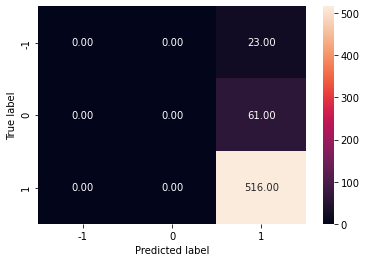

Confusion Matrix HeatMap :  None


In [27]:
nb = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', MultinomialNB()),
              ])
nb.fit(X_train, y_train)

yhat = nb.predict(X_test)

print("Accuracy Score Is : ", accuracy_score(y_test, yhat))
print('classification Score =','\n', classification_report(y_test,yhat))
print("Confusion Matrix HeatMap : ",draw_confmatrix(y_test, yhat, "-1","0", "1"))


### Logistic 

Accuracy Score Is :  0.8166666666666667
classification Score = 
               precision    recall  f1-score   support

          -1       0.62      0.43      0.51        23
           0       0.30      0.44      0.36        61
           1       0.92      0.88      0.90       516

    accuracy                           0.82       600
   macro avg       0.61      0.59      0.59       600
weighted avg       0.84      0.82      0.83       600

Confusion Matrix Is: [[ 10   4   9]
 [  3  27  31]
 [  3  60 453]]


C:\Users\kanik\anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass labels=[-1, 0, 1] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


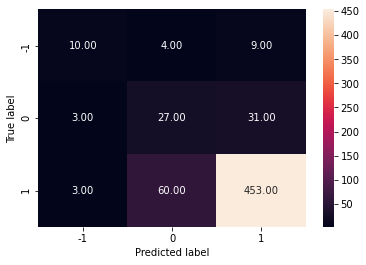

Confusion Matrix HeatMap :  None


In [28]:
from sklearn.linear_model import LogisticRegression
logreg = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('lr', LogisticRegression(multi_class='multinomial', class_weight='balanced')),
              ])

logreg.fit(X_train, y_train)

yhat = logreg.predict(X_test)

print("Accuracy Score Is : ", accuracy_score(y_test, yhat))
print('classification Score =','\n', classification_report(y_test,yhat))
print("Confusion Matrix HeatMap : ",draw_confmatrix(y_test, yhat, "-1","0", "1"))

### Linear SVC

Accuracy Score Is :  0.8716666666666667
classification Score = 
               precision    recall  f1-score   support

          -1       1.00      0.04      0.08        23
           0       0.62      0.13      0.22        61
           1       0.88      1.00      0.93       516

    accuracy                           0.87       600
   macro avg       0.83      0.39      0.41       600
weighted avg       0.86      0.87      0.83       600

Confusion Matrix Is: [[  1   3  19]
 [  0   8  53]
 [  0   2 514]]


C:\Users\kanik\anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass labels=[-1, 0, 1] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


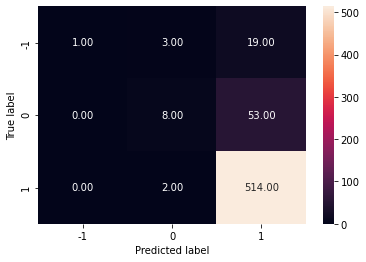

Confusion Matrix HeatMap :  None


In [29]:
from sklearn.svm import SVC

text_clf = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', SVC( class_weight='balanced')),
])

text_clf.fit(X_train, y_train)

yhat = text_clf.predict(X_test)

print("Accuracy Score Is : ", accuracy_score(y_test, yhat))
print('classification Score =','\n', classification_report(y_test,yhat))
print("Confusion Matrix HeatMap : ",draw_confmatrix(y_test, yhat, "-1","0", "1"))

### SGD Classification model

Accuracy Score Is :  0.8783333333333333
classification Score = 
               precision    recall  f1-score   support

          -1       0.75      0.26      0.39        23
           0       0.62      0.13      0.22        61
           1       0.89      0.99      0.94       516

    accuracy                           0.88       600
   macro avg       0.75      0.46      0.51       600
weighted avg       0.85      0.88      0.84       600

Confusion Matrix Is: [[  6   3  14]
 [  1   8  52]
 [  1   2 513]]


C:\Users\kanik\anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass labels=[-1, 0, 1] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


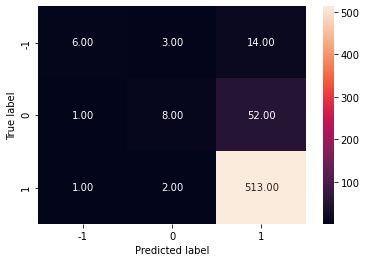

Confusion Matrix HeatMap :  None


In [30]:
from sklearn.linear_model import SGDClassifier

text_clf = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', SGDClassifier(loss='hinge', penalty='l2',
                         alpha=1e-3, random_state=42,
                         max_iter=5, tol=None, class_weight='balanced')),
])

text_clf.fit(X_train, y_train)

yhat = text_clf.predict(X_test)

print("Accuracy Score Is : ", accuracy_score(y_test, yhat))
print('classification Score =','\n', classification_report(y_test,yhat))
print("Confusion Matrix HeatMap : ",draw_confmatrix(y_test, yhat, "-1","0", "1"))

### Random Forest

Accuracy Score Is :  0.8433333333333334
classification Score = 
               precision    recall  f1-score   support

          -1       0.47      0.30      0.37        23
           0       0.34      0.36      0.35        61
           1       0.92      0.92      0.92       516

    accuracy                           0.84       600
   macro avg       0.58      0.53      0.55       600
weighted avg       0.84      0.84      0.84       600

Confusion Matrix Is: [[  7   7   9]
 [  4  22  35]
 [  4  35 477]]


C:\Users\kanik\anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass labels=[-1, 0, 1] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


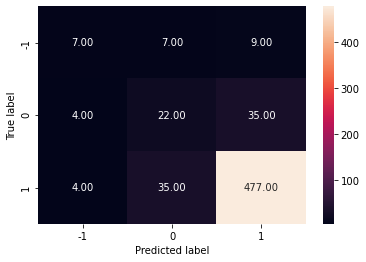

Confusion Matrix HeatMap :  None


In [31]:
from sklearn.ensemble import RandomForestClassifier

rf = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', RandomForestClassifier(criterion='gini', max_features='sqrt', random_state=100,
                                   n_estimators = 629, min_samples_split = 10, min_samples_leaf = 4,
                                   max_depth = 99, bootstrap = False,
                                   n_jobs=-1, class_weight='balanced'))
])

rf.fit(X_train, y_train)

yhat = rf.predict(X_test)

print("Accuracy Score Is : ", accuracy_score(y_test, yhat))
print('classification Score =','\n', classification_report(y_test,yhat))
print("Confusion Matrix HeatMap : ",draw_confmatrix(y_test, yhat, "-1","0", "1"))

### K-nearest Neighbour classifier

Accuracy Score Is :  0.86
classification Score = 
               precision    recall  f1-score   support

          -1       1.00      0.04      0.08        23
           0       0.38      0.05      0.09        61
           1       0.87      0.99      0.93       516

    accuracy                           0.86       600
   macro avg       0.75      0.36      0.37       600
weighted avg       0.82      0.86      0.81       600

Confusion Matrix Is: [[  1   1  21]
 [  0   3  58]
 [  0   4 512]]


C:\Users\kanik\anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass labels=[-1, 0, 1] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


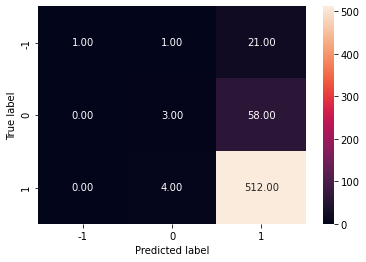

Confusion Matrix HeatMap :  None


In [32]:
from sklearn.neighbors import KNeighborsClassifier


knn = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('knn', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'))
])

knn.fit(X_train, y_train)

yhat = knn.predict(X_test)

print("Accuracy Score Is : ", accuracy_score(y_test, yhat))
print('classification Score =','\n', classification_report(y_test,yhat))
print("Confusion Matrix HeatMap : ",draw_confmatrix(y_test, yhat, "-1","0", "1"))

### Logistic + OVR

Accuracy Score Is :  0.8216666666666667
classification Score = 
               precision    recall  f1-score   support

          -1       0.62      0.35      0.44        23
           0       0.31      0.49      0.38        61
           1       0.93      0.88      0.90       516

    accuracy                           0.82       600
   macro avg       0.62      0.57      0.58       600
weighted avg       0.85      0.82      0.83       600

Confusion Matrix Is: [[  8   7   8]
 [  3  30  28]
 [  2  59 455]]


C:\Users\kanik\anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass labels=[-1, 0, 1] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


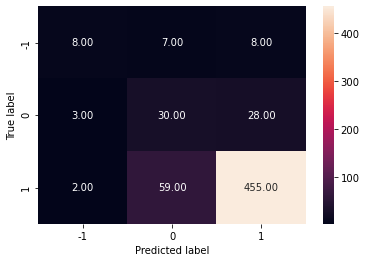

Confusion Matrix HeatMap :  None


In [33]:
from sklearn.linear_model import LogisticRegression
logreg = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('lr', LogisticRegression(multi_class='ovr', class_weight='balanced')),
              ])

logreg.fit(X_train, y_train)

yhat = logreg.predict(X_test)

print("Accuracy Score Is : ", accuracy_score(y_test, yhat))
print('classification Score =','\n', classification_report(y_test,yhat))
print("Confusion Matrix HeatMap : ",draw_confmatrix(y_test, yhat, "-1","0", "1"))

# Interpretation and Selection of the Base model:
The models had very high accuracy and very low recall scores. Looking at the confusion matrix, it was evident that the models were classifying most of the data points as the majority class. This called for data balancing techniques that could reduce the effect of this class imbalance.
From the above base model Logistic Regression gave best ‘macro avg’ of 0.59 and highest F1-score of 0.51 for Negative class. For our hotels Classifying the Negative sentiments would matter more to increase customer satisfaction.
 

In [34]:
from imblearn.over_sampling import SMOTE, RandomOverSampler, ADASYN

In [35]:
# word level tf-idf
tfidf_vect = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', max_features=100000)
tfidf_vect.fit(Review['Review_clean'])
xtrain_tfidf =  tfidf_vect.transform(X_train)
xvalid_tfidf =  tfidf_vect.transform(X_test)

# Re-sampling Imbalanced Training

### Logistic+SMOTE
SMOTE: Synthetic Minority Oversampling Technique utilizes a k-nearest neighbour algorithm to create synthetic data. SMOTE starts by choosing random data from the minority class, then k-nearest neighbours from the data are set. Synthetic data is then made between the random data and the randomly selected k-nearest neighbour.

Accuracy Score Is :  0.8533333333333334
classification Score = 
               precision    recall  f1-score   support

          -1       0.64      0.39      0.49        23
           0       0.39      0.41      0.40        61
           1       0.92      0.93      0.92       516

    accuracy                           0.85       600
   macro avg       0.65      0.58      0.60       600
weighted avg       0.85      0.85      0.85       600

Confusion Matrix Is: [[  9   4  10]
 [  2  25  34]
 [  3  35 478]]


C:\Users\kanik\anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass labels=[-1, 0, 1] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


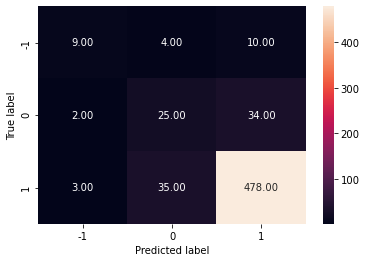

Confusion Matrix HeatMap :  None


In [36]:
lr = LogisticRegression(multi_class='multinomial')

#SMOTE
sm = SMOTE(random_state=777)
sm_xtrain_tfidf, sm_train_y = sm.fit_sample(xtrain_tfidf, y_train)
lr.fit(sm_xtrain_tfidf, sm_train_y)


yhat = lr.predict(xvalid_tfidf)

print("Accuracy Score Is : ", accuracy_score(y_test, yhat))
print('classification Score =','\n', classification_report(y_test,yhat))
print("Confusion Matrix HeatMap : ",draw_confmatrix(y_test, yhat, "-1","0", "1"))

### Logistic+ Random Oversampling
Random Over sampling: Randomly duplicate examples in the minority class.

Accuracy Score Is :  0.8633333333333333
classification Score = 
               precision    recall  f1-score   support

          -1       0.71      0.43      0.54        23
           0       0.42      0.41      0.42        61
           1       0.92      0.94      0.93       516

    accuracy                           0.86       600
   macro avg       0.68      0.59      0.63       600
weighted avg       0.86      0.86      0.86       600

Confusion Matrix Is: [[ 10   3  10]
 [  2  25  34]
 [  2  31 483]]


C:\Users\kanik\anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass labels=[-1, 0, 1] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


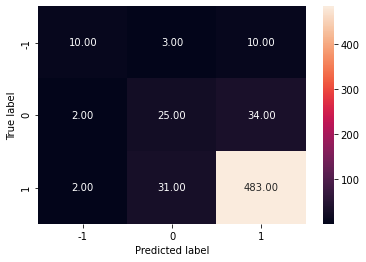

Confusion Matrix HeatMap :  None


In [37]:
lr = LogisticRegression(multi_class='multinomial')

#Random Oversampling
ros = RandomOverSampler(random_state=777)
ros_xtrain_tfidf, ros_train_y = ros.fit_sample(xtrain_tfidf, y_train)

lr.fit(ros_xtrain_tfidf, ros_train_y)

yhat = lr.predict(xvalid_tfidf)

print("Accuracy Score Is : ", accuracy_score(y_test, yhat))
print('classification Score =','\n', classification_report(y_test,yhat))
print("Confusion Matrix HeatMap : ",draw_confmatrix(y_test, yhat, "-1","0", "1"))

### Logistic+ADASYN
ADASYN (Adaptive Synthetic) is an algorithm that generates synthetic data, and its greatest advantages are not copying the same minority data and generating more data for “harder to learn” examples

Accuracy Score Is :  0.8483333333333334
classification Score = 
               precision    recall  f1-score   support

          -1       0.64      0.39      0.49        23
           0       0.37      0.41      0.39        61
           1       0.92      0.92      0.92       516

    accuracy                           0.85       600
   macro avg       0.64      0.57      0.60       600
weighted avg       0.85      0.85      0.85       600

Confusion Matrix Is: [[  9   5   9]
 [  2  25  34]
 [  3  38 475]]


C:\Users\kanik\anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass labels=[-1, 0, 1] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


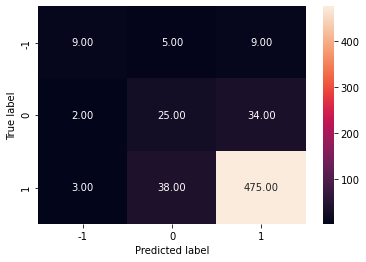

Confusion Matrix HeatMap :  None


In [38]:
lr = LogisticRegression(multi_class='multinomial')


#ADASYN
ad = ADASYN(random_state=777)
ad_xtrain_tfidf, ad_train_y = ad.fit_sample(xtrain_tfidf, y_train)

lr.fit(ad_xtrain_tfidf, ad_train_y)

yhat = lr.predict(xvalid_tfidf)

print("Accuracy Score Is : ", accuracy_score(y_test, yhat))
print('classification Score =','\n', classification_report(y_test,yhat))
print("Confusion Matrix HeatMap : ",draw_confmatrix(y_test, yhat, "-1","0", "1"))

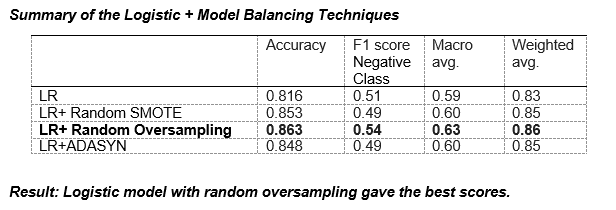

## Logistic on Unigram+Bigrams

In [39]:
# word level tf-idf
tfidf_vect = TfidfVectorizer(analyzer='word',ngram_range=(1,2), max_features=100000)
tfidf_vect.fit(Review['Review_clean'])
xtrain_tfidf =  tfidf_vect.transform(X_train)
xvalid_tfidf =  tfidf_vect.transform(X_test)

Accuracy Score Is :  0.865
classification Score = 
               precision    recall  f1-score   support

          -1       0.62      0.22      0.32        23
           0       0.43      0.26      0.33        61
           1       0.90      0.97      0.93       516

    accuracy                           0.86       600
   macro avg       0.65      0.48      0.53       600
weighted avg       0.84      0.86      0.85       600

Confusion Matrix Is: [[  5   4  14]
 [  2  16  43]
 [  1  17 498]]


C:\Users\kanik\anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass labels=[-1, 0, 1] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


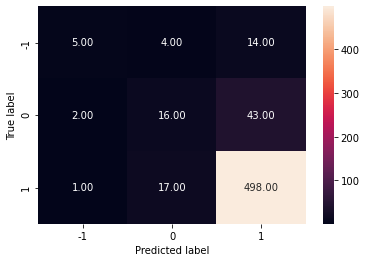

Confusion Matrix HeatMap :  None


In [40]:
lr = LogisticRegression(multi_class='multinomial')

#Random Oversampling
ros = RandomOverSampler(random_state=777)
ros_xtrain_tfidf, ros_train_y = ros.fit_sample(xtrain_tfidf, y_train)

lr.fit(ros_xtrain_tfidf, ros_train_y)

yhat = lr.predict(xvalid_tfidf)

print("Accuracy Score Is : ", accuracy_score(y_test, yhat))
print('classification Score =','\n', classification_report(y_test,yhat))
print("Confusion Matrix HeatMap : ",draw_confmatrix(y_test, yhat, "-1","0", "1"))

Building a logistic using Logistic Uni-grams + Bi-grams gave no improvement over the earlier results. 

## K-Folds cross-validation

In [41]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold(shuffle=True,n_splits=5, random_state=0)
cv_results = cross_val_score(lr, ros_xtrain_tfidf, ros_train_y, cv=cv)
cv_results

array([0.97983871, 0.98064516, 0.97983871, 0.98627926, 0.99031477])

The minimum accuracy that could be obtained using the best fitted model is 97%

## Building Model with additional featurs from LDA

In [42]:
from sklearn.decomposition import LatentDirichletAllocation, NMF

In [43]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.datasets import make_multilabel_classification

# This produces a feature matrix of token counts, similar to what
# CountVectorizer would produce on text.
topic_num = 5
lda = LatentDirichletAllocation(n_components = topic_num)

In [44]:
Review['Review_clean']

0       lock downit first stay hotel many doubt stay h...
1       everything want star hotel get even covid kaal...
2       professional trip look safe relax stay expecta...
3       good experience stay hyatt manesar hospitality...
4       birthday party wife cleaniness quality hotel g...
                              ...                        
2995    hotel almost odd lot waste space courtyards si...
2996    hotel really amaze colleague spend three fanta...
2997    trip gurgaon work stay property week half prop...
2998    excellent total comfort best homely feel great...
2999    place posh really posh felt place every door s...
Name: Review_clean, Length: 3000, dtype: object

In [45]:
#Review['Review_clean']=[" ".join(review) for review in Review['Review_clean'].values]
tfvec = TfidfVectorizer(ngram_range=(1,2),min_df=5, max_df= 0.95,sublinear_tf=True, norm='l2')
tdfidf = tfvec.fit_transform(Review['Review_clean'])
tfidf = pd.DataFrame(tdfidf.toarray(), columns = tfvec.get_feature_names())
tfidf

,abhishek,able,absolute,absolutely,absolutely amaze,absolutely amazing,absolutely love,absolutely loved,accept,access,...,years,yes,yesterday,yet,youd,youll,young,young man,youre,yummy
0,0.0,0.0,0.0,0.186336,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2996,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2997,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2998,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [46]:
lda_f = lda.fit(tfidf)
lda_weights = lda_f.transform(tfidf)
lda_weights

array([[0.02978945, 0.69331506, 0.02938353, 0.21860494, 0.02890702],
       [0.03284773, 0.07367535, 0.03208463, 0.82931903, 0.03207326],
       [0.85893035, 0.03550349, 0.03486863, 0.03600289, 0.03469464],
       ...,
       [0.09763006, 0.02121288, 0.0205218 , 0.84012301, 0.02051225],
       [0.23971094, 0.67637208, 0.02729406, 0.02912785, 0.02749508],
       [0.02632056, 0.02768925, 0.02576098, 0.89446824, 0.02576097]])

In [47]:
lda_wt = pd.DataFrame(data=lda_weights)
lda_wt.shape

(3000, 5)

In [48]:
X_lda_tfidf = pd.concat([tfidf,lda_wt], axis=1)
X_lda_tfidf.shape

(3000, 7133)

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X_lda_tfidf, Review['Rating'], test_size=0.20, random_state=100, stratify=Review['Rating'])

In [50]:
lr = LogisticRegression(multi_class='multinomial', class_weight='balanced')

In [51]:
lr_lda = lr.fit(X_train,y_train)

In [52]:
yhat= lr_lda.predict(X_test)

Accuracy Score Is :  0.8133333333333334
classification Score = 
               precision    recall  f1-score   support

          -1       0.37      0.43      0.40        23
           0       0.33      0.51      0.40        61
           1       0.93      0.87      0.90       516

    accuracy                           0.81       600
   macro avg       0.54      0.60      0.57       600
weighted avg       0.85      0.81      0.83       600

Confusion Matrix Is: [[ 10   6   7]
 [  4  31  26]
 [ 13  56 447]]


C:\Users\kanik\anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass labels=[-1, 0, 1] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


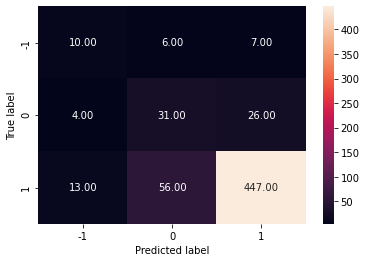

Confusion Matrix HeatMap :  None


In [53]:
print("Accuracy Score Is : ", accuracy_score(y_test, yhat))
print('classification Score =','\n', classification_report(y_test,yhat))
print("Confusion Matrix HeatMap : ",draw_confmatrix(y_test, yhat, "-1","0", "1"))

Conclusion: Due to data imbalance, the base models performed poorly. Using Oversampling with Logistic algorithm is giving best results. Models using Bigrams and LDA did not give any improvement on the model.